In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("Preprocessed_before_standardization_and_normalization.csv")
df

,price,m2_price,square,rooms,district,micro_district,building_type,floor,floors,condition,building_age,floor_to_floors,is_good_floor
0,110880,720,154,4,1,0,2,12,14,2,2,0.857143,0
1,57000,740,77,2,1,0,2,5,12,2,2,0.416667,1
2,57750,750,77,2,1,0,1,5,12,2,2,0.416667,1
3,57000,740,77,2,1,0,2,5,12,2,2,0.416667,1
4,55000,1279,43,1,2,3,2,1,12,6,12,0.083333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9659,45000,881,51,1,1,0,0,9,9,5,4,1.000000,0
9660,150000,1456,103,3,1,0,1,3,12,5,6,0.250000,1
9661,120000,1143,105,5,2,4,2,5,6,6,35,0.833333,0
9662,62000,969,64,2,1,2,1,6,12,5,4,0.500000,1


In [3]:
# General info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9664 entries, 0 to 9663
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            9664 non-null   int64  
 1   m2_price         9664 non-null   int64  
 2   square           9664 non-null   int64  
 3   rooms            9664 non-null   object 
 4   district         9664 non-null   int64  
 5   micro_district   9664 non-null   int64  
 6   building_type    9664 non-null   int64  
 7   floor            9664 non-null   int64  
 8   floors           9664 non-null   int64  
 9   condition        9664 non-null   int64  
 10  building_age     9664 non-null   int64  
 11  floor_to_floors  9664 non-null   float64
 12  is_good_floor    9664 non-null   int64  
dtypes: float64(1), int64(11), object(1)
memory usage: 981.6+ KB
None


In [4]:
# First few rows
df.head()

,price,m2_price,square,rooms,district,micro_district,building_type,floor,floors,condition,building_age,floor_to_floors,is_good_floor
0,110880,720,154,4,1,0,2,12,14,2,2,0.857143,0
1,57000,740,77,2,1,0,2,5,12,2,2,0.416667,1
2,57750,750,77,2,1,0,1,5,12,2,2,0.416667,1
3,57000,740,77,2,1,0,2,5,12,2,2,0.416667,1
4,55000,1279,43,1,2,3,2,1,12,6,12,0.083333,0


In [5]:
# Descriptive statistics
df.describe()

,price,m2_price,square,district,micro_district,building_type,floor,floors,condition,building_age,floor_to_floors,is_good_floor
count,9664.000000,9664.000000,9664.000000,9664.000000,9664.000000,9664.000000,9664.000000,9664.000000,9664.000000,9664.000000,9664.000000,9664.000000
mean,72511.398593,1026.695054,71.500414,1.433154,1.448986,1.099855,6.024731,9.789114,4.478580,8.915356,0.623643,0.311362
std,36451.246496,195.169191,34.225939,0.894336,1.307397,0.720815,3.502887,3.588623,1.413319,47.026008,0.280812,0.463074
min,9500.000000,494.000000,10.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,0.000000,0.000000,-0.200000,0.000000
25%,49000.000000,892.000000,47.000000,1.000000,0.000000,1.000000,3.000000,9.000000,4.000000,4.000000,0.388889,0.000000
50%,63000.000000,1036.000000,63.000000,1.000000,1.000000,1.000000,5.000000,10.000000,5.000000,5.000000,0.666667,0.000000
75%,85000.000000,1155.000000,86.000000,2.000000,2.000000,2.000000,9.000000,12.000000,5.000000,7.000000,0.888889,1.000000
max,296000.000000,1566.000000,347.000000,3.000000,4.000000,2.000000,18.000000,25.000000,7.000000,2025.000000,1.000000,1.000000


In [6]:
# Get the maximum values for 'building_age' and 'square'
max_building_age = df["building_age"].max()
max_square = df["square"].max()

# Filter out rows where 'building_age' is the maximum or 'square' is the maximum
df = df[(df["building_age"] != max_building_age) & (df["square"] != max_square)]

# Check the filtered DataFrame
df.head()


,price,m2_price,square,rooms,district,micro_district,building_type,floor,floors,condition,building_age,floor_to_floors,is_good_floor
0,110880,720,154,4,1,0,2,12,14,2,2,0.857143,0
1,57000,740,77,2,1,0,2,5,12,2,2,0.416667,1
2,57750,750,77,2,1,0,1,5,12,2,2,0.416667,1
3,57000,740,77,2,1,0,2,5,12,2,2,0.416667,1
4,55000,1279,43,1,2,3,2,1,12,6,12,0.083333,0


In [7]:
features = ['price', 'square', 'm2_price', 'building_age']

plt.figure(figsize=(14, 10))
for i, col in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x=col)  # Change 'y' to 'x' for horizontal boxplots
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


NameError: name 'plt' is not defined

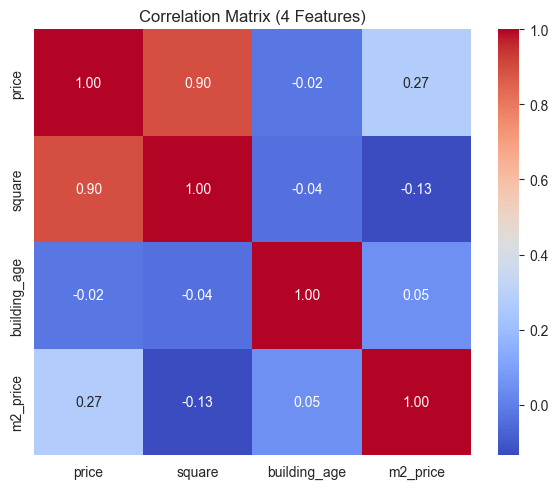

In [54]:
cols = ['price', 'square', 'building_age', 'm2_price']

plt.figure(figsize=(6, 5))
sns.heatmap(df[cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix (4 Features)")
plt.tight_layout()
plt.show()

 Correlation Matrix Interpretation (4 Features)

| Feature Pair              | Correlation | Interpretation                                                                 |
|---------------------------|-------------|---------------------------------------------------------------------------------|
| `price` & `square`        | **0.90**     | **Strong positive correlation** — as the apartment size increases, so does the price. Very logical. |
| `price` & `m2_price`      | **0.27**     | **Weak positive correlation** — price per m² doesn't strongly align with total price, likely because small expensive flats can have high m² prices. |
| `price` & `building_age`  | **–0.02**    | **Very weak negative correlation** — building age has almost no influence on price. |
| `square` & `m2_price`     | **–0.13**    | **Weak negative correlation** — larger apartments tend to have a slightly lower price per m². Common in real estate. |
| `square` & `building_age` | **–0.04**    | **No real relationship** — apartment size doesn’t depend on building age. |
| `m2_price` & `building_age` | **0.05**  | **No significant correlation** — building age doesn’t affect price per m². |

---




##  Summary of Analysis

This project conducts a comprehensive statistical analysis of real estate data, focusing on **price prediction** and **factors affecting property value**.

---

### ✅ **1. Descriptive Statistics**

| Feature         | Mean      | Std. Dev. | Min   | Max     |
|-----------------|-----------|-----------|-------|---------|
| Price (`price`) | ~72511,39 | ~36451.24 | 9,500 | 296,000 |
| Area (`square`) | ~71.5 m²  | ~34.22    | 10    | 347     |
| Price/m²        | ~1026.69  | ~195.16   | 494   | 1,566   |
| Building Age    | ~8,91     | ~47.02    | 0     | 75      |

---

###  **2. Correlation Analysis**

- Strong correlation between:
  - **Price** and **Square** → `r = 0.90`
  - **Price** and **Price/m²** → `r = 0.27`


- Weak correlation :
  - **Price** and **Building age** → `r = -0.02`
  - **Square** and **Building age** → `r = -0.04`
  - **Square** and **price/m2** → `r = -0.13`
  - **Building age** and **Price/m²** → `r = 0.05`

- Weak correlation for floor-based features.

>  Heatmap confirms that **property size is the most important driver of price**.



---



###  **3. Visualizations**

- ✅ Heatmap of correlations
- ✅ Boxplots for price across building types and floors


---

###  Conclusion

- **Size and condition** are the top predictors of price.
- **Building type and floor level** significantly influence pricing.
- The regression model can be used for **price prediction and market analysis**.

---